In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
# Load MNIST handwritten digit data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


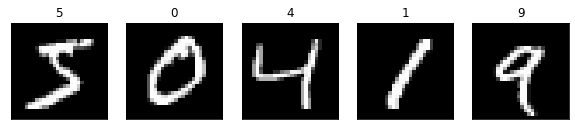

In [5]:
# Display some images
fig, axes = plt.subplots(ncols=5, sharex=False, 
    sharey=True, figsize=(10, 4))
for i in range(5):
    axes[i].set_title(y_train[i])
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [6]:
to_categorical(3, num_classes=10)

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [7]:
# Convert y_train into one-hot format
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))
y_train = np.array(temp)
# Convert y_test into one-hot format
temp = []
for i in range(len(y_test)):    
    temp.append(to_categorical(y_test[i], num_classes=10))
y_test = np.array(temp)

In [8]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [9]:
# Create simple Neural Network model
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 3925      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                60        
Total params: 3,985
Trainable params: 3,985
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [11]:
 history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 133us/step - loss: 1.6330 - accuracy: 0.5004 - val_loss: 1.2356 - val_accuracy: 0.6779
Epoch 2/5
60000/60000 [==============================] - 7s 121us/step - loss: 1.1083 - accuracy: 0.6746 - val_loss: 0.9346 - val_accuracy: 0.7237
Epoch 3/5
60000/60000 [==============================] - 7s 123us/step - loss: 0.9378 - accuracy: 0.7065 - val_loss: 0.8499 - val_accuracy: 0.7363
Epoch 4/5
60000/60000 [==============================] - 8s 125us/step - loss: 0.8659 - accuracy: 0.7153 - val_loss: 0.8272 - val_accuracy: 0.7379
Epoch 5/5
60000/60000 [==============================] - 8s 125us/step - loss: 0.8201 - accuracy: 0.7305 - val_loss: 0.7888 - val_accuracy: 0.7326


In [12]:
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


In [13]:
predictions = model.predict(X_test)
print(predictions)

[[5.4245847e-03 4.6178501e-02 2.1287040e-03 ... 8.0123293e-01
  3.1669032e-02 8.2384281e-02]
 [5.3637899e-03 2.2086434e-04 8.8421309e-01 ... 2.0551076e-06
  6.7211203e-03 5.1919580e-04]
 [1.3228711e-04 8.4941971e-01 1.5600696e-02 ... 4.7441348e-02
  3.1966727e-02 5.5137081e-03]
 ...
 [1.9913316e-03 1.3082528e-02 9.8752053e-03 ... 4.6424389e-02
  1.8406821e-02 4.1944015e-01]
 [1.1381700e-01 4.5090017e-04 3.5414943e-03 ... 3.2352915e-03
  2.0974918e-01 1.2436048e-02]
 [2.4231808e-02 4.9269252e-05 1.6683174e-02 ... 2.9221133e-04
  1.7174256e-04 9.1016879e-03]]


In [14]:
predictions = np.argmax(predictions, axis=1)
print(predictions)

[7 2 1 ... 4 5 6]


In [15]:
y_pred =model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis = 1)

In [16]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       980
           1       0.92      0.91      0.92      1135
           2       0.80      0.81      0.80      1032
           3       0.67      0.83      0.74      1010
           4       0.46      0.83      0.59       982
           5       0.71      0.61      0.66       892
           6       0.72      0.95      0.82       958
           7       0.86      0.88      0.87      1028
           8       0.80      0.54      0.64       974
           9       0.50      0.00      0.01      1009

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.69     10000
weighted avg       0.73      0.73      0.70     10000

[[ 913    0    7    6    0   22   28    4    0    0]
 [   0 1031   58   32    4    1    2    1    6    0]
 [  32    5  833   37    8    2   60   12   43    0]
 [  10   16   68  840    1   27   17   21   10    0]
 [   0    2   16    0  818   

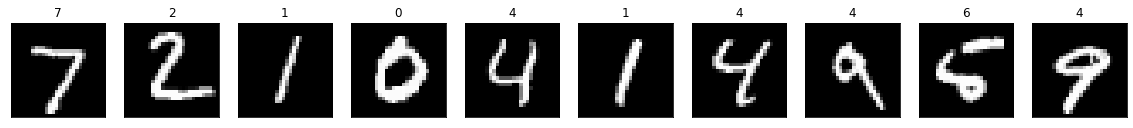

In [17]:
fig, axes = plt.subplots(ncols=10, sharex=False,
                         sharey=True, figsize=(20, 4))
for i in range(10):
    axes[i].set_title(predictions[i])
    axes[i].imshow(X_test[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

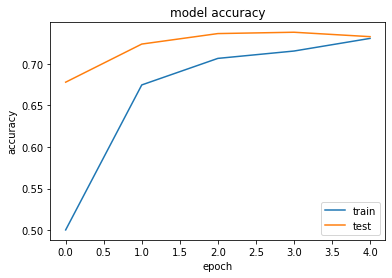

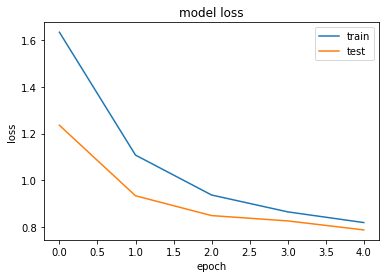

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()